In [1]:
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from python import base


DATA_DIR = base.BASE_DIR / 'data/KOSIS/data'
FIGURES_DIR = base.BASE_DIR / 'figures'


DATA_FILES = [*map(Path, glob(str(DATA_DIR / '*.csv')))]

for file in DATA_FILES:
    print(file.name)

문화예술행사_참여_만족도대중음악_연예_20241129080354.csv
공연시설__공연장_가동률_20241129074204.csv
지난_1년_동안_한번이상_참여한_여가활동_유형_복수응답_문화예술....csv
공연시설_및_단체_수_20241129073956.csv
지난_1년_동안_여가생활을_위한_한_달_평균_지출_금액_20241129075431.csv
지속적_반복적_참여_여가활동_분야_및_활동_문화예술관람활동_20241129075447.csv
문화예술행사_직접_관람_만족도대중음악_연예_20241129080511.csv
공연시설_및_단체_매출액_20241129080941.csv
문화예술행사_직접_관람횟수__대중음악_연예_20241129080635.csv
공연시설_및_단체_수_20241129080915.csv
행사별_직접관람률_복수응답__20241129080738.csv
초등학교_4학년_팬덤_활동_빈도_20241129071614.csv
공연시설_및_단체_매출액_20241129073846.csv
중학교_1학년_팬덤_활동_빈도_20241129072114.csv
분야별_문화예술행사_관람률_20241129080554.csv


In [2]:
def load_data() -> pd.DataFrame:
    df = pd.read_csv(DATA_DIR / '공연시설__공연장_가동률_20241129074204.csv', header=None)
    df = df.transpose()

    # drop current header
    df.columns = df.iloc[1]
    df = df[2:]
    df.columns = ['연도', '통계분류', *df.columns[2:]]
    df['소계'] = df['소계'].astype(np.float64)
    return df

load_data()

,연도,통계분류,소계,서울,부산,대구,인천,광주,대전,울산,...,광역도,수도권,비수도권,중앙정부,문예회관,기타(공공),대학로,민간[대학로 외],공공,민간
2,2013,공연장수,1227.0,-,-,-,-,-,-,-,...,514,676,551,25,339,260,170,433,561,666
3,2013,전체 가동률,72.5,-,-,-,-,-,-,-,...,54.4,80.2,62.9,100,56.1,60.2,99.4,80.4,60.7,82.3
4,2014,공연장수,1280.0,-,-,-,-,-,-,-,...,541,682,598,25,362,271,165,457,588,692
5,2014,전체 가동률,67.4,-,-,-,-,-,-,-,...,55.4,74.1,59.8,99.4,55.4,51,94.5,75.2,56.4,76.7
6,2015,공연장수,1290.0,468,76,60,42,42,37,23,...,540,667,623,33,370,273,156,458,602,688
7,2015,전체 가동률,65.8,87.8,67.2,74.2,60.6,51.3,71.2,61.1,...,47.1,77.7,53,93.7,53.7,42.6,111.1,72.1,51.5,78.3
8,2016,공연장수,1268.0,437,75,60,40,40,43,21,...,550,641,627,33,388,152,255,440,609,659
9,2016,전체 가동률,60.8,82.5,64.4,62.4,55.7,57.8,63.2,77.5,...,42.8,71.7,49.7,84.2,48.1,99.6,42.3,67.7,47,73.6
10,2017,공연장수,1323.0,450,80,67,43,40,44,22,...,575,664,659,38,419,268,147,451,660,663
11,2017,전체 가동률,61.3,77,67.6,51.8,59.6,62.4,70.9,73.9,...,48.1,68.6,53.9,77.2,49.9,55,86.7,66,53.5,69


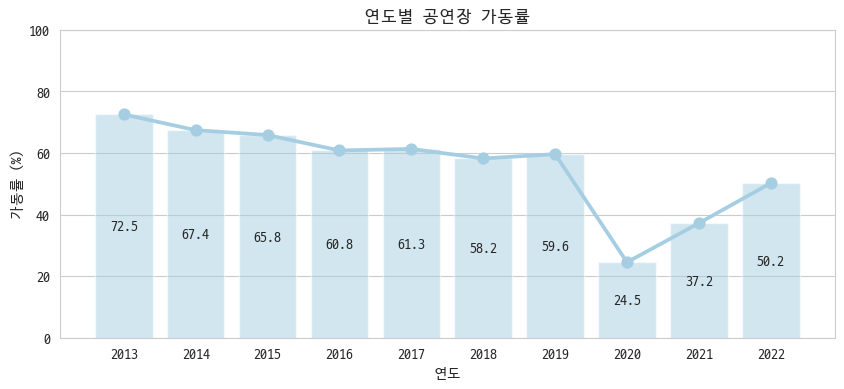

In [3]:
df = load_data()
df = df[df['통계분류'] == '전체 가동률']

plt.figure(figsize=(10, 4))
plt.title('연도별 공연장 가동률')
sns.pointplot(data=df, x='연도', y='소계')
plt.ylim(0, 100)
plt.ylabel('가동률 (%)')
plt.bar_label(plt.bar(x=df['연도'], height=df['소계'], alpha=0.5), labels=df['소계'], label_type='center')
plt.savefig(FIGURES_DIR / '연도별_공연장_가동률')
plt.show()